 # Analyse du Dataset Titanic

Ce notebook démontre les étapes de préparation, de nettoyage et d'analyse du dataset Titanic.

## 1. Importation des Bibliothèques

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

## 2. Chargement des Données

In [14]:
# Charger le dataset Titanic
df = pd.read_csv("Titanic_dataset.csv")

# Afficher les premières lignes
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Exploration Initiale des Données

In [15]:
# Statistiques descriptives pour les colonnes numériques
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# Vérifier la structure et les types de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
# Identifier les valeurs manquantes
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 4. Gestion des Valeurs Manquantes

In [18]:
# Imputer les valeurs manquantes dans 'Age' avec la moyenne
df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].mean())

# Imputer les valeurs manquantes dans 'Embarked' avec le mode
df.loc[:, 'Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Supprimer la colonne 'Cabin' en raison de trop nombreuses valeurs manquantes
df = df.drop(columns=['Cabin'])

# Vérifier les valeurs manquantes après imputation
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 5. Détection et Gestion des Doublons

In [19]:
# Vérifier les doublons
print("Nombre de doublons :", df.duplicated().sum())

# Supprimer les doublons
df.drop_duplicates(inplace=True)

# Vérifier les doublons après suppression
print("Nombre de doublons après suppression :", df.duplicated().sum())

Nombre de doublons : 0
Nombre de doublons après suppression : 0


## 6. Normalisation et Transformation des Données

In [20]:
# Appliquer une transformation logarithmique à 'Fare' pour gérer l'asymétrie
df['Fare'] = np.log1p(df['Fare'])

# Normaliser 'Age' avec StandardScaler
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

# Afficher les données transformées
df[['Age', 'Fare']].head()

,Age,Fare
0,-0.592481,2.110213
1,0.638789,4.280593
2,-0.284663,2.188856
3,0.407926,3.990834
4,0.407926,2.202765


## 7. Traitement des Variables Catégorielles

In [21]:
# Encoder 'Sex' avec LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Encoder 'Embarked' en one-hot
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Afficher les données encodées
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.592481,1,0,A/5 21171,2.110213,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.638789,1,0,PC 17599,4.280593,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.284663,0,0,STON/O2. 3101282,2.188856,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.407926,1,0,113803,3.990834,False,True
4,5,0,3,"Allen, Mr. William Henry",1,0.407926,0,0,373450,2.202765,False,True


## 8. Visualisation pour la Détection d'Anomalies

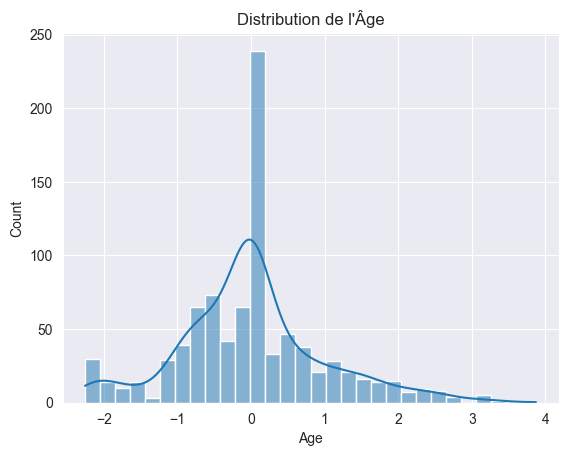

In [22]:
# Visualiser la distribution de 'Age'
sns.histplot(df['Age'], kde=True)
plt.title('Distribution de l\'Âge')
plt.show()

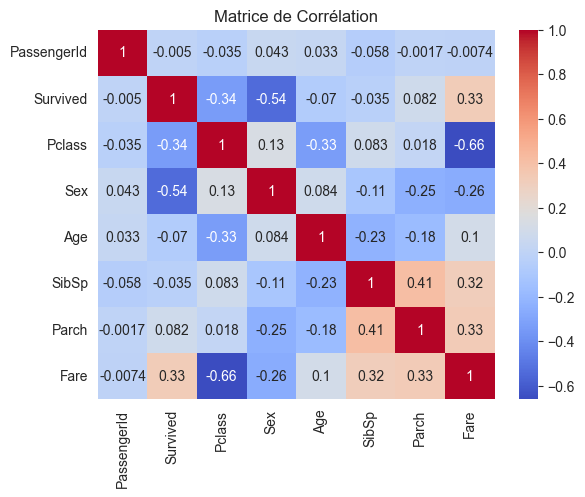

In [23]:
#Filtrer uniquement les colonnes numériques : Avant de calculer la matrice de corrélation, sélectionnez les colonnes numériques uniquement
# Visualiser la matrice de corrélation
corr_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()


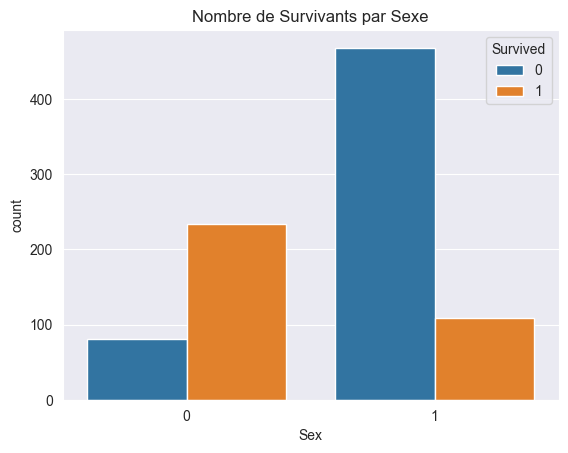

In [24]:
# Visualiser le nombre de survivants par 'Sex'
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Nombre de Survivants par Sexe')
plt.show()

## 9. Conclusion

Le dataset Titanic a été préparé et nettoyé avec succès pour une analyse ou une modélisation ultérieure. Les étapes clés incluent la gestion des valeurs manquantes, la suppression des doublons, la normalisation des données numériques et l'encodage des variables catégorielles. Des visualisations ont été utilisées pour détecter les anomalies et comprendre la distribution des données.

## 10. Références

- Source du Dataset Titanic : https://github.com/MedZaim/gouvernance_de_donnees/blob/master/Titanic_dataset.csv
- Documentation de Pandas : https://pandas.pydata.org/
- Documentation de Scikit-learn : https://scikit-learn.org/
- Documentation de Seaborn : https://seaborn.pydata.org/